# Volatility forecasting using ARCH and GARCH
The GARCH model or Generalized Autoregressive Conditional Heteroskedasticity differs from ARIMA in that it can model a time dependent change in variance of a time series.

Here we will use 2 years of SP500 price data to serve as our dataset.

For more information:
https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/


In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() 

#import stockstats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

import math

In [2]:
#load daily data from Yahhttp://localhost:8888/notebooks/Fintech/Garch.ipynb#oo Finance
# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2019-01-01")


[*********************100%***********************]  1 of 1 downloaded


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,216.826019,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,218.115921,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,217.942657,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,218.722412,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,218.000443,46265300
2017-01-10,226.479996,227.449997,226.009995,226.460007,218.000443,63771900
2017-01-11,226.360001,227.100006,225.589996,227.100006,218.616516,74650000
2017-01-12,226.500000,226.750000,224.960007,226.529999,218.067825,72113200
2017-01-13,226.729996,227.399994,226.690002,227.050003,218.568375,62717900


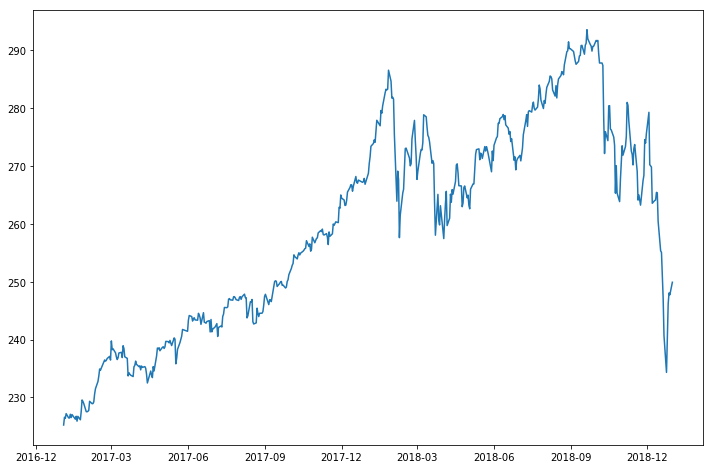

In [11]:
plt.plot(data['Close'])

Like ARIMA, the ARCH or GARCH models require the data to be stationary.

In [56]:
dtrans.mean()

0.049261463073852346

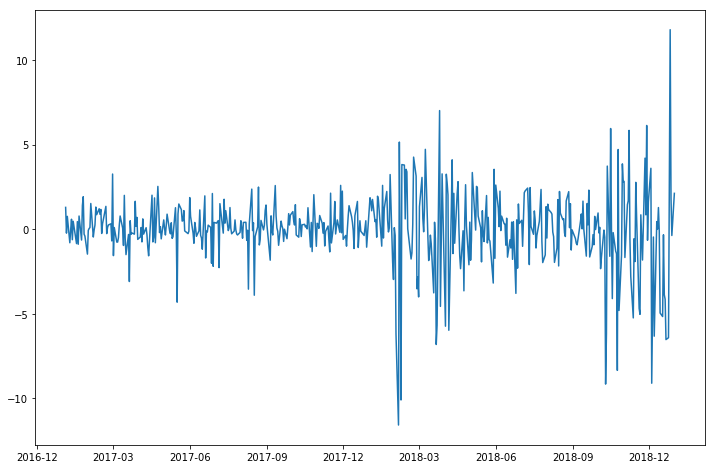

In [57]:
#dtrans = 100 * (data['Close'] / data['Close'].shift(1) - 1).dropna()
dtrans = data['Close'].diff().dropna()

#Remove the mean, even though it appears to be nearly zero
dtrans -= dtrans.mean()




plt.plot(dtrans)

In [65]:
#Ideally we should do a dickey-fuller test for autocorrelation
from statsmodels.tsa.stattools import adfuller
dickeyfullertest = adfuller(dtrans.values)
print('ADF Statistic: %f' % dickeyfullertest[0])
print('p-value: %f' % dickeyfullertest[1])
print('Critical Values:')
for key, value in dickeyfullertest[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.343490
p-value: 0.000004
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


The more negative the ADF Statistic is the more likely that the time series does not have a unit root, meaning that it is stationary.

A p-value > 0.05 means that the data has a unit root and is not-stationary.

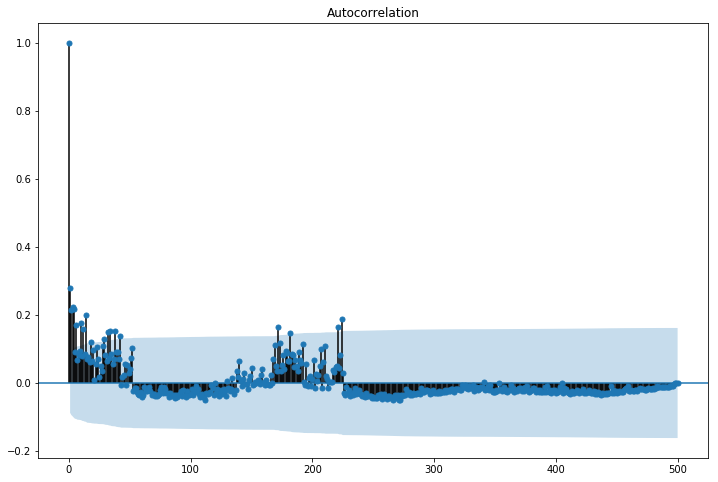

In [58]:
#See if there is any autocorrelation in the variance of this dataset
variance = dtrans**2

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(variance)
plt.show()

It appears there may be some significant positive autocorrelation in variance out to maybe 40 lag time steps.  This shows that volatility is serially correlated to the past and that we can use this information to predict future volatility.

In [59]:
#Split the dataset into a train and test set to evaluate the performance of the forecast.
tenpercent = int(dtrans.size * 0.10 )
train, test = dtrans[:-tenpercent], dtrans[-tenpercent:]

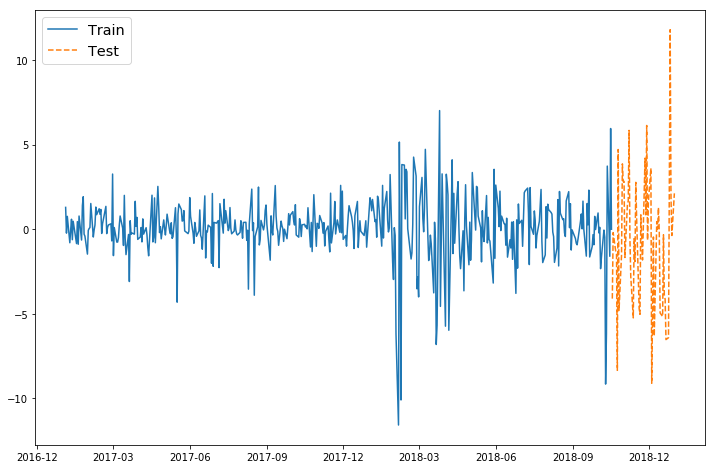

In [133]:
plt.plot(train,label='Train')
plt.plot(test,linestyle='--',label='Test')
plt.legend(fontsize='x-large')
plt.show()

In [177]:
#Define the model
from arch import arch_model
model = arch_model(train, mean='Zero', vol='GARCH', p=40)
result = model.fit()

#Note: To perform a GARCH model simply set the vol parameter to 'GARCH'

Iteration:      1,   Func. Count:     44,   Neg. LLF: 867.7900513913885
Iteration:      2,   Func. Count:     91,   Neg. LLF: 844.2460444420972
Iteration:      3,   Func. Count:    136,   Neg. LLF: 831.1022941727283
Iteration:      4,   Func. Count:    181,   Neg. LLF: 827.6836104172482
Iteration:      5,   Func. Count:    226,   Neg. LLF: 823.0853062306608
Iteration:      6,   Func. Count:    271,   Neg. LLF: 819.3351580384613
Iteration:      7,   Func. Count:    316,   Neg. LLF: 816.9227094692351
Iteration:      8,   Func. Count:    361,   Neg. LLF: 814.5520260849576
Iteration:      9,   Func. Count:    406,   Neg. LLF: 812.9910177457224
Iteration:     10,   Func. Count:    451,   Neg. LLF: 812.1335003910189
Iteration:     11,   Func. Count:    496,   Neg. LLF: 810.9739570178199
Iteration:     12,   Func. Count:    541,   Neg. LLF: 810.3333385805688
Iteration:     13,   Func. Count:    586,   Neg. LLF: 809.2588211713133
Iteration:     14,   Func. Count:    631,   Neg. LLF: 808.368436

In [178]:
print(result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -804.111
Distribution:                  Normal   AIC:                           1692.22
Method:            Maximum Likelihood   BIC:                           1864.90
                                        No. Observations:                  451
Date:                Sun, Feb 17 2019   Df Residuals:                      409
Time:                        18:46:27   Df Model:                           42
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2749      8.646  3.180e-02      0.975 [-16.670, 17.22

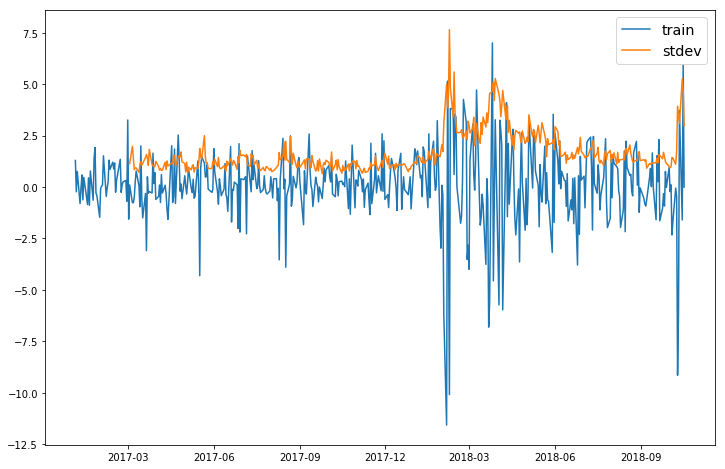

In [179]:
#Make a forecast on our training data as a sanity check
#Since we use 40 lags for the model we should only attempt to predict 40 lags from the beginning of our data
yhat = result.forecast(start=40)

plt.plot(train, label='train')
plt.plot(yhat.variance.pow(0.5), label='stdev')
plt.legend(fontsize='x-large')
plt.show()

In [180]:
#Create a forecast to compare with test
#This produces N periods into the future
yhat = result.forecast(horizon=test.size)
#yhat.variance.values[-1, :]

In [159]:
#Should I take a moving average of the variance to get comparable values?
#w=10
#vartemp = variance[-(tenpercent + w - 1):]
#vartempma = vartemp.rolling(10).mean().dropna()

In [160]:
#What if we simply take the rolling variance?
#w=10
#testtemp = dtrans[-(tenpercent + w - 1):]
#vartempma2 = testtemp.rolling(w).var().dropna()

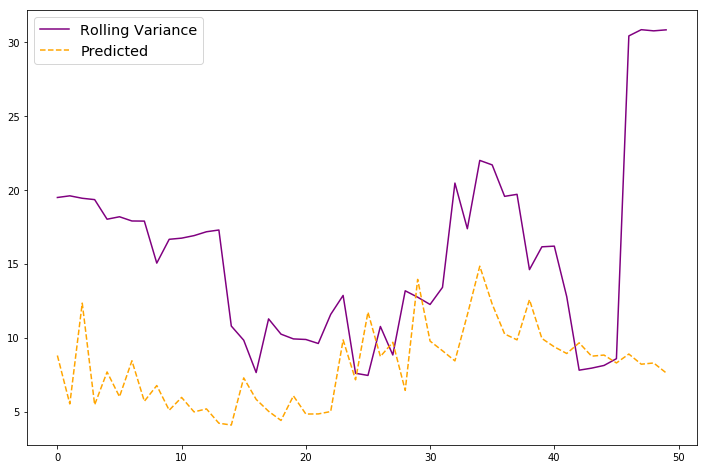

In [181]:
#Plot the actual and predicted variance
#plt.plot(variance[-tenpercent:].values, label='Variance', color='royalblue')

#Rolling variance may provide something better to compare
window=10
dtrans[-(tenpercent + window - 1):].rolling(window).var().dropna()
plt.plot(vartempma2.values, label='Rolling Variance', color='purple')

plt.plot(yhat.variance.values[-1, :], label='Predicted', linestyle='--', color='orange')
plt.legend(fontsize = 'x-large')
plt.show()

## Results
Note: This may just be a poor example to use as a test case since the test data happened to represents a huge event in the market.

I am not sure why the absolute scale of the variance doesn't match our sample variance.  If anyone has an idea please comment.  But I am pleased to see that the forecast ARCH variance does correlate well with our rolling variance.


For more information about this please review the following resources:
https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity

https://www.quora.com/What-is-the-difference-between-GARCH-and-ARCH

https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
